In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

sns.set()

In [6]:
train_data=pd.read_excel(r"C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\0. ML Projects\Data_Train.xlsx")

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
train_data.shape

(10683, 11)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

In [14]:
# .dt.day will extract only the day of that date
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [15]:
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
train_data.drop(["Date_of_Journey"],axis=1, inplace = True)

In [18]:
# Fetch hour and minute from departure type

def remove_hour_min(train_data,Time):
    train_data[Time+"_hour"]=pd.to_datetime(train_data[Time]).dt.hour
    train_data[Time+"_min"]=pd.to_datetime(train_data[Time]).dt.minute
    train_data.drop([Time],axis=1, inplace=True)
    return train_data

In [19]:
train_data=remove_hour_min(train_data,Time='Arrival_Time')
train_data=remove_hour_min(train_data,Time='Dep_Time')

In [20]:
#Dealing with Duration

duration=list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))


In [21]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins
train_data.drop(["Duration"],axis=1, inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


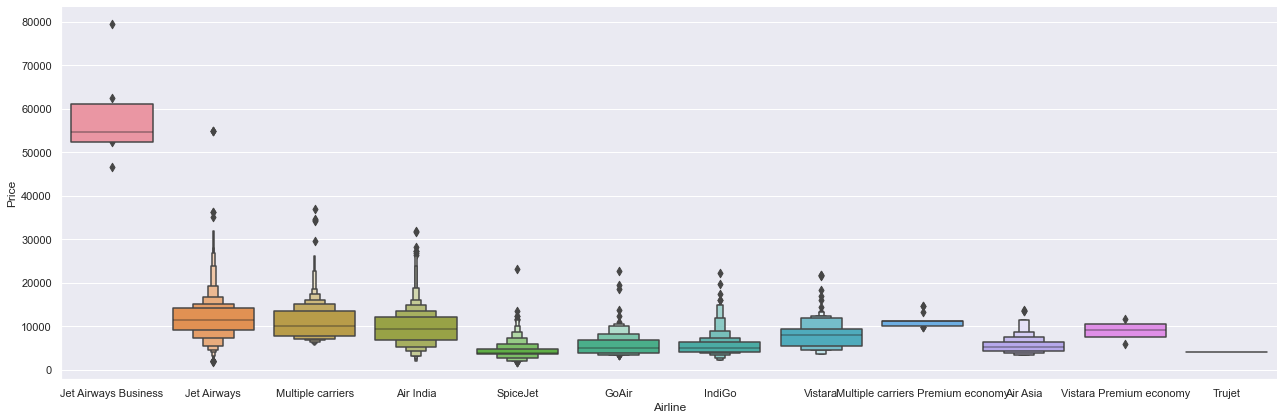

In [23]:
# Airline Vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Handling Categorical Data

Nominal Data--> Data are not in any order--> One Hot Encoder is used in this case
Oridnal Data--> Data is in Order --> LabelEncoding is used in this case

In [24]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
def one_hot_encoder(feature):
    encoded=feature
    encoded=pd.get_dummies(feature,drop_first=True)
    return encoded

In [26]:
# As Airline is Nominal Categorical Data, performing One Hot Encoding on it

Airline= one_hot_encoder(train_data[["Airline"]])


In [27]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

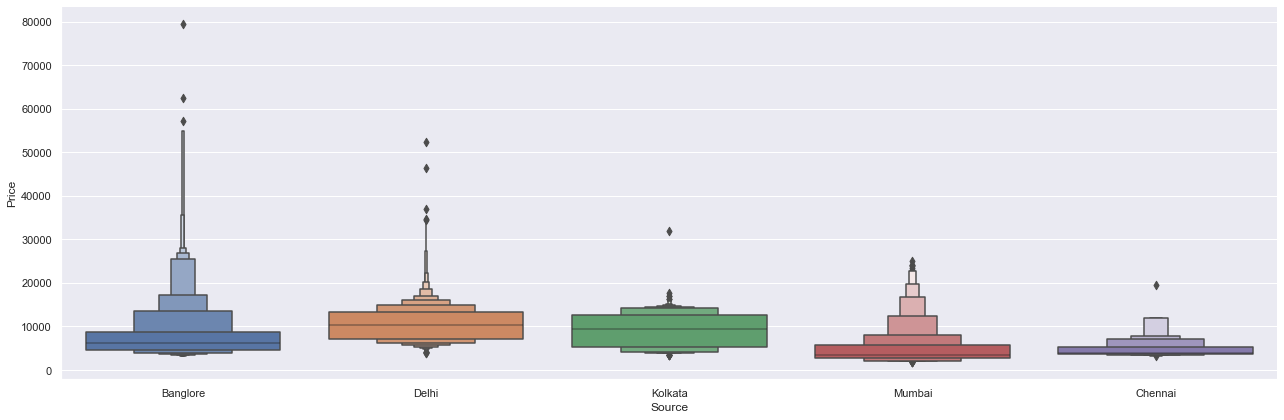

In [29]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [30]:
Source=one_hot_encoder(train_data[["Source"]])

In [31]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
train_data[["Destination"]].value_counts()

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

In [33]:
Destination=one_hot_encoder(train_data[["Destination"]])

In [34]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#Route & No of Total Stops are doing the same thing!!
 Additional_Info ==> 80% no_info

so we can drop Route and Additional info

In [35]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [36]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,4,45


In [37]:
train_data['Total_Stops'].value_counts()

#Its observed in the data that more the number of stop, the price will increase

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3, "4 stops":4},inplace=True)

In [39]:
#sns.scatterplot(y='Price',x='Airline',hue='Total_Stops',data=train_data)

In [40]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [41]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [43]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [44]:
data_train.shape

(10682, 30)

In [45]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Feature Selection

In [46]:
X=data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Dep_Time_hour',
       'Dep_Time_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,1,10,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,13,15,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,4,25,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,23,30,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,21,35,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y=data_train.loc[:,'Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [48]:
# split into train test

In [49]:
# Visualise price Vs stops with airline
df=train_data

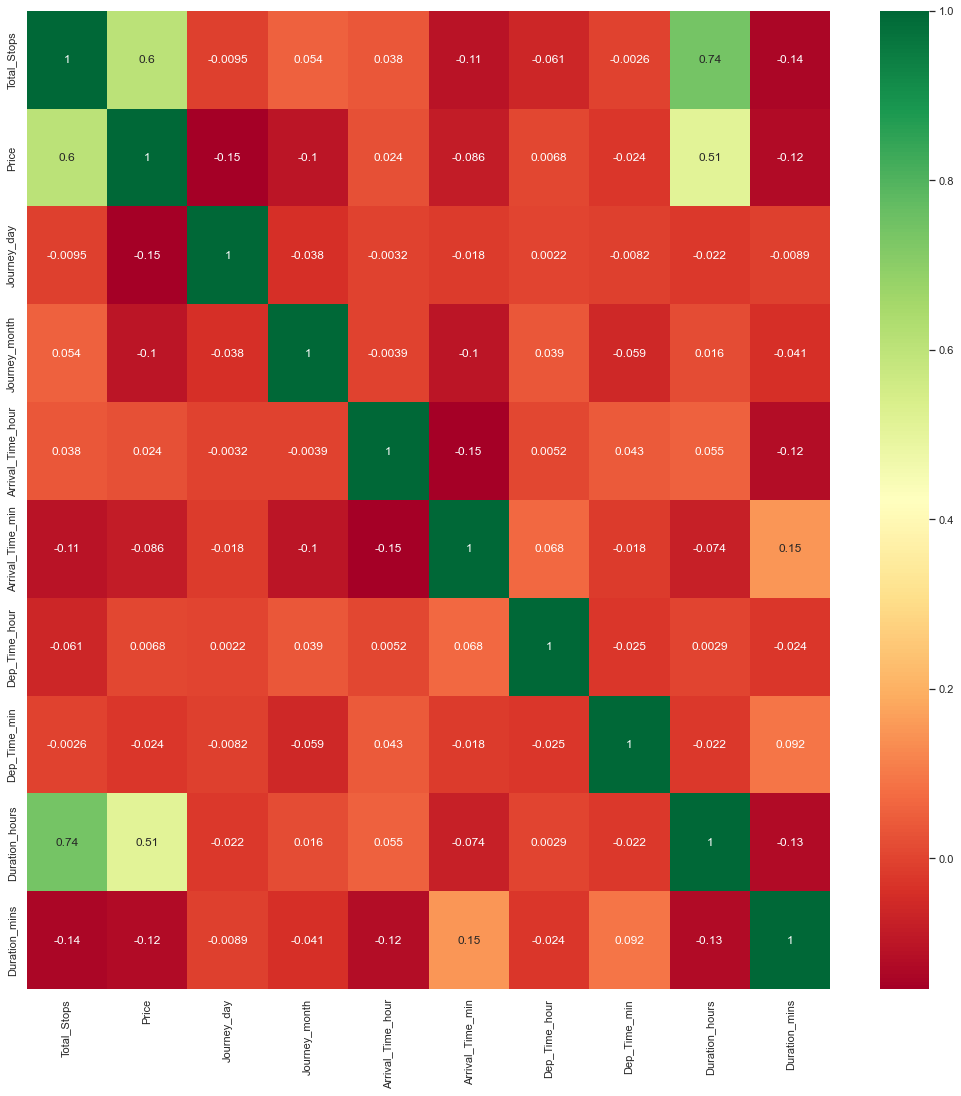

In [50]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

#If highly correlated more than 0.8,0.9 correlation is present, multicolinearity, then drop one od the independent feature

In [51]:
#Import Feature using Extra Tree Regressor

selection =ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[2.12027246e-01 1.44500673e-01 5.27844929e-02 2.78131610e-02
 1.96075644e-02 2.43985715e-02 2.06074166e-02 1.39836502e-01
 1.77693350e-02 9.89022220e-03 1.77265060e-03 1.73281345e-02
 1.37329220e-01 6.80234506e-02 1.98935036e-02 8.56221750e-04
 3.04236304e-03 1.02669344e-04 5.00851447e-03 8.64943801e-05
 4.14022334e-04 1.10375001e-02 3.19293795e-03 7.57839594e-03
 9.50344323e-03 1.45059518e-02 5.44677465e-03 6.14088713e-04
 2.50284779e-02]


In [53]:
feature_score=pd.Series(selection.feature_importances_)
features=pd.Series(X.columns)

In [54]:
feature_imp_table=pd.concat([features,feature_score], axis=1)
feature_imp_table

,0,1
0,Total_Stops,0.212027
1,Journey_day,0.144501
2,Journey_month,0.052784
3,Arrival_Time_hour,0.027813
4,Arrival_Time_min,0.019608
5,Dep_Time_hour,0.024399
6,Dep_Time_min,0.020607
7,Duration_hours,0.139837
8,Duration_mins,0.017769
9,Airline_Air India,0.009890


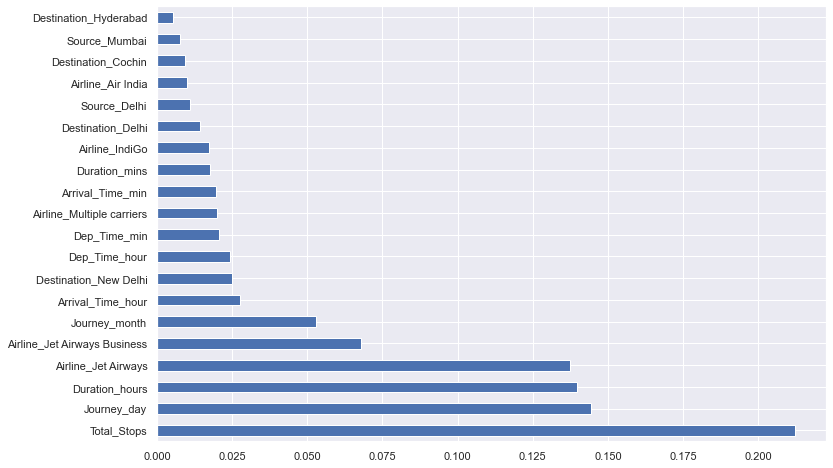

In [55]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Model Using Random Forest

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [57]:
reg_model=RandomForestRegressor()
reg_model.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
y_pred=reg_model.predict(X_test)

In [59]:
reg_model.score(X_train,y_train)

0.9534080647244628

In [60]:
reg_model.score(X_test,y_test)

0.7970664571564022

C:\Users\rutuj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


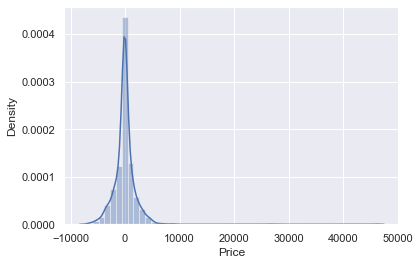

In [61]:
sns.distplot(y_test-y_pred) #error is forming gaussian distribution. so results are good
plt.show()

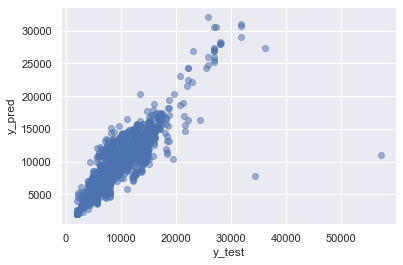

In [62]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [63]:
print('Mean Absolutr Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 

Mean Absolutr Error:  1177.4725249555336
Mean Squared Error:  4375664.480855353
Root Mean Squared Error:  2091.808901610124


In [64]:
metrics.r2_score(y_test,y_pred)

0.7970664571564022

# HyperParameter Tuning

In [65]:
#Randomized Search CV

#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number if levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#Minimum number of samples required to split a node
min_samples_split=[2,5,19,15,100]

#Minimum number of samples required at each Leaf node
min_samples_leaf=[1,2,5,10]

In [66]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,\
             'min_samples_leaf':min_samples_leaf }


In [68]:
rf_random=RandomizedSearchCV(estimator=reg_model,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [69]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=19, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 19, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [71]:
prediction=rf_random.predict(X_test)

In [72]:
 prediction=rf_random.predict(X_test)

C:\Users\rutuj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


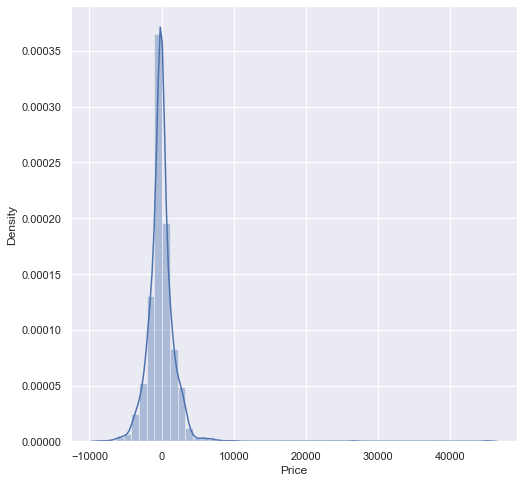

In [73]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

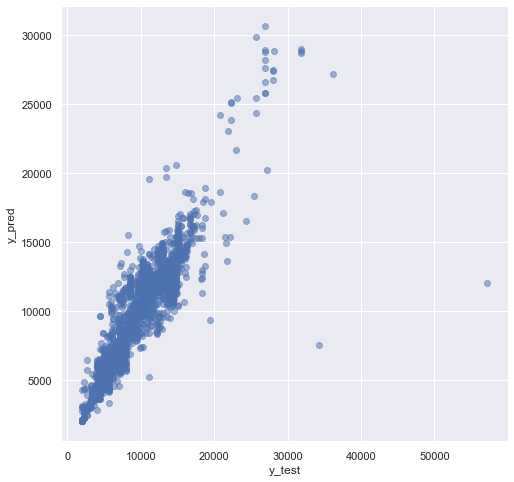

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
print('Mean Absolutr Error: ',metrics.mean_absolute_error(y_test,prediction))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,prediction))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,prediction))) 

Mean Absolutr Error:  1165.5322699705753
Mean Squared Error:  4055807.2008458744
Root Mean Squared Error:  2013.9034735671605


In [76]:
# W/o cross validation
print('Mean Absolutr Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 

Mean Absolutr Error:  1177.4725249555336
Mean Squared Error:  4375664.480855353
Root Mean Squared Error:  2091.808901610124


# To save the model and reuse it again

In [82]:
import pickle
file=open('flight_rf.pkl','wb')

pickle.dump(rf_random,file)

In [83]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [84]:
y_prediction=forest.predict(X_test)

In [85]:
metrics.r2_score(y_test,y_prediction)

0.8119007232023108